In [1]:
from __future__ import annotations
from dataclasses import dataclass, field
import databento as db
from databento_dbn import FIXED_PRICE_SCALE, UNDEF_PRICE
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tqdm 

In [2]:
def read_dfs(kind="mbo", by_symbol=True, symbol=None) -> pl.DataFrame:
    if kind == "mbp":
        filelist = [
            "/Users/danny/trading/databento/mbp10/dbeq-basic-20240131.mbp-10.csv", 
            "/Users/danny/trading/databento/mbp10/dbeq-basic-20240201.mbp-10.csv",
            "/Users/danny/trading/databento/mbp10/dbeq-basic-20240202.mbp-10.csv",
        ]
    else:
        filelist = [
            "/Users/danny/trading/databento/mbo/dbeq-basic-20240131.mbo.csv", 
            "/Users/danny/trading/databento/mbo/dbeq-basic-20240201.mbo.csv",
            "/Users/danny/trading/databento/mbo/dbeq-basic-20240202.mbo.csv",
        ]

    dfs = []
    for csv in filelist:
        df = pl.read_csv(csv, use_pyarrow=True)
        dfs.append(df)
    dfs = pl.concat(dfs)


    if symbol is not None:
        dfs = dfs.filter(pl.col("symbol") == symbol)
        by_symbol = False

    # Scale prices
    dfs = dfs.with_columns([
        pl.col("price") / FIXED_PRICE_SCALE,
    ])

    if by_symbol:
        dfs = dfs.group_by("symbol")
        # Return a dictionary of symbol -> DataFrame
        return {symbol: df for symbol, df in dfs}

    return dfs

In [6]:
def book_pressure(df, side, window_size):
    
        return df["ask_size"] - df["bid_size"]
    else:
        return df["bid_size"] - df["ask_size"]

In [7]:
dfs = read_dfs(kind="mbo", by_symbol=True, symbol="GOOG")

In [3]:
dfs = read_dfs(kind="mbp", by_symbol=True, symbol="GOOG")

In [4]:
dfs.columns

['ts_recv',
 'ts_event',
 'rtype',
 'publisher_id',
 'instrument_id',
 'action',
 'side',
 'depth',
 'price',
 'size',
 'flags',
 'ts_in_delta',
 'sequence',
 'bid_px_00',
 'ask_px_00',
 'bid_sz_00',
 'ask_sz_00',
 'bid_ct_00',
 'ask_ct_00',
 'bid_px_01',
 'ask_px_01',
 'bid_sz_01',
 'ask_sz_01',
 'bid_ct_01',
 'ask_ct_01',
 'bid_px_02',
 'ask_px_02',
 'bid_sz_02',
 'ask_sz_02',
 'bid_ct_02',
 'ask_ct_02',
 'bid_px_03',
 'ask_px_03',
 'bid_sz_03',
 'ask_sz_03',
 'bid_ct_03',
 'ask_ct_03',
 'bid_px_04',
 'ask_px_04',
 'bid_sz_04',
 'ask_sz_04',
 'bid_ct_04',
 'ask_ct_04',
 'bid_px_05',
 'ask_px_05',
 'bid_sz_05',
 'ask_sz_05',
 'bid_ct_05',
 'ask_ct_05',
 'bid_px_06',
 'ask_px_06',
 'bid_sz_06',
 'ask_sz_06',
 'bid_ct_06',
 'ask_ct_06',
 'bid_px_07',
 'ask_px_07',
 'bid_sz_07',
 'ask_sz_07',
 'bid_ct_07',
 'ask_ct_07',
 'bid_px_08',
 'ask_px_08',
 'bid_sz_08',
 'ask_sz_08',
 'bid_ct_08',
 'ask_ct_08',
 'bid_px_09',
 'ask_px_09',
 'bid_sz_09',
 'ask_sz_09',
 'bid_ct_09',
 'ask_ct_09',
 '

In [7]:
# select where depth != 0
sample = dfs.filter(pl.col("depth") != 0)
sample

ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_ct_01,ask_ct_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_ct_02,ask_ct_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_ct_03,ask_ct_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_ct_04,ask_ct_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_ct_05,ask_ct_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_ct_06,ask_ct_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_ct_07,ask_ct_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
"datetime[ns, UTC]","datetime[ns, UTC]",i64,i64,i64,str,str,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
2024-01-31 14:30:00.553259940 UTC,2024-01-31 14:30:00.553241522 UTC,10,42,7151,"""A""","""N""",1,144.71,87,130,18418,2874,145360000000,154440000000,101,10,1,1,144710000000,9223372036854775807,87,0,1,0,143330000000,9223372036854775807,10,0,1,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,"""GOOG"""
2024-01-31 14:30:00.567005895 UTC,2024-01-31 14:30:00.566984487 UTC,10,42,7151,"""A""","""N""",1,141.51,93,130,21408,2921,143330000000,154440000000,10,10,1,1,141510000000,9223372036854775807,93,0,1,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,"""GOOG"""
2024-01-31 14:30:00.567071434 UTC,2024-01-31 14:30:00.567051561 UTC,10,42,7151,"""C""","""N""",1,141.51,93,130,19873,2922,143330000000,154440000000,10,10,1,1,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,"""GOOG"""
2024-01-31 14:30:00.576189383 UTC,2024-01-31 14:30:00.576169575 UTC,10,42,7151,"""C""","""N""",1,145.38,101,130,19808,2947,143330000000,145320000000,10,32,1,1,9223372036854775807,154440000000,0,10,0,1,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,"""GOOG"""
2024-01-31 14:30:00.623100385 UTC,2024-01-31 14:30:00.623080077 UTC,10,42,7151,"""A""","""N""",1,145.27,101,130,20308,2986,143330000000,145250000000,10,97,1,1,9223372036854775807,145270000000,0,101,0,1,9223372036854775807,154440000000,0,10,0,1,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0,0,9223372036854775807,9223372036854775807,0,0,0

In [17]:
dfs.filter(pl.col("side") == "N")

ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
"datetime[ns, UTC]","datetime[ns, UTC]",i64,i64,i64,str,str,f64,i64,i64,i64,i64,i64,i64,str
2024-01-31 05:20:59.532845888 UTC,2024-01-31 05:20:59.532574065 UTC,160,39,7151,"""R""","""N""",9.2234e9,0,4,0,128,200706,2053,"""GOOG"""
2024-01-31 05:21:36.739739448 UTC,2024-01-31 05:21:36.739403559 UTC,160,40,7151,"""R""","""N""",9.2234e9,0,4,0,130,265318,2154,"""GOOG"""
2024-01-31 05:21:36.739746485 UTC,2024-01-31 05:21:36.739403559 UTC,160,40,7151,"""R""","""N""",9.2234e9,0,4,0,130,265351,2154,"""GOOG"""
2024-01-31 10:33:27.745699317 UTC,2024-01-31 10:33:27.745665946 UTC,160,42,7151,"""R""","""N""",9.2234e9,0,6,0,130,33371,980,"""GOOG"""
2024-01-31 13:01:25.224594870 UTC,2024-01-31 13:01:25.224258136 UTC,160,41,7151,"""T""","""N""",145.29,11,0,2276260,146,77828,59263,"""GOOG"""
2024-01-31 13:02:22.965895101 UTC,2024-01-31 13:02:22.965693988 UTC,160,41,7151,"""T""","""N""",145.19,1,0,2429929,146,57274,60867,"""GOOG"""
2024-01-31 13:03:26.863801251 UTC,2024-01-31 13:03:26.863575961 UTC,160,41,7151,"""T""","""N""",145.1,34,0,2613641,146,61327,63009,"""GOOG"""
2024-01-31 13:05:40.277875620 UTC,2024-01-31 13:05:40.277667703 UTC,160,41,7151,"""T""","""N""",145.15,34,0,2946358,146,55504,70291,"""GOOG"""
2024-01-31 13:06:24.917557697 UTC,2024-01-31 13:06:24.917375461 UTC,160,41,7151,"""T""","""N""",145.17,5,0,3056627,146,55139,71770,"""GOOG"""


In [ ]:
@dataclass
class MarketConfig:
    aggregation: str = "1s"

class Market: 
    """Holds a series of order books and their associated features"""
    # TODO: 
    # Slice into the market at a certain time stamp, get the best bid/ask at that time for each symbol
    # Get the order book at a certain time stamp for each symbol
    # Get the features at a certain time stamp for each symbol
    def __init__(self, dfs):
        self.dfs = dfs
        self.books = []
        self.features = []
        self._build_books()
        self._build_features()

    def _build_books(self):
        for symbol, df in self.dfs.items():
            book = OrderBook(df)
            self.books.append(book)

    def _build_features(self):
        for book in self.books:
            features = book.features()
            self.features.append(features)

    def plot(self, symbol):
        for book in self.books:
            if book.symbol == symbol:
                book.plot()

In [ ]:
from dataclasses import dataclass

OrderId = int
UnixTimestamp = int

@dataclass
class Order:
    side: str
    price: int
    size: int
    ts_event: UnixTimestamp

@dataclass
class PriceLevel:
    price: int | None = None
    size: int = 0
    count: int = 0

@dataclass
class Book:
    orders: dict[OrderId, Order] = field(default_factory=dict)

    def bbo(self) -> tuple[PriceLevel, PriceLevel]:
        best_ask = PriceLevel()
        best_bid = PriceLevel()
        for order in self.orders.values():
            if order.side == "A":
                if best_ask.price is None or best_ask.price > order.price:
                    best_ask = PriceLevel(
                        price=order.price,
                        size=order.size,
                        count=1,
                    )
                elif best_ask.price == order.price:
                    best_ask.size += order.size
                    best_ask.count += 1
            elif order.side == "B":
                if best_bid.price is None or best_bid.price < order.price:
                    best_bid = PriceLevel(
                        price=order.price,
                        size=order.size,
                        count=1,
                    )
                elif best_bid.price == order.price:
                    best_bid.size += order.size
                    best_bid.count += 1
        return best_bid, best_ask

    def apply(
        self,
        ts_event: UnixTimestamp,
        action: str,
        side: str,
        order_id: int,
        price: int,
        size: int,
    ) -> None:
        # Trade or Fill: no change
        if action == "T" or action == "F":
            return

        # Clear book: remove all resting orders
        if action == "R":
            self.orders.clear()
            return

        # side=N and UNDEF_PRICE are only valid with Trade, Fill, and Clear actions
        assert side == "A" or side == "B"
        assert price != UNDEF_PRICE

        # Add: insert a new order
        if action == "A":
            self.orders[order_id] = Order(side, price, size, ts_event)

        # Cancel: partially or fully cancel some size from a resting order
        elif action == "C":
            existing_order = self.orders[order_id]
            assert existing_order.size >= size
            existing_order.size -= size
            # If the full size is cancelled, remove the order from the book
            if existing_order.size == 0:
                self.orders.pop(order_id)

        # Modify: change the price and/or size of a resting order
        elif action == "M":
            existing_order = self.orders[order_id]
            # The order loses its priority if the price changes or the size increases
            if existing_order.price != price or existing_order.size < size:
                existing_order.ts_event = ts_event
            existing_order.size = size
            existing_order.price = price

class OrderBook:
    # Given a dataframe of orders, build the orderbook and calculate features
    def __init__(self, config: MarketConfig, df: pl.DataFrame):
        self.config = config
        self.df = df
        self.symbol = df["symbol"][0]
        self.book = self._build_book()

    def _build_book(self):
        # Build the state of the order book at each time step, then compute rolling features 
        book = pl.DataFrame()
        range_start = self.df["ts_event"].min()
        range_end = self.df["ts_event"].max()
        # Arrange timestamps in the book between the min and max timestamps, at the aggregation interval
        timestamps = pl.range(range_start, range_end, self.config.aggregation)
        # Create a new row for each timestamp
        book = book.lazy().with_column("ts_event", timestamps)
        
        # Add the max-min timestamp as a date range
        features = features.with_column("ts_event", self.df["ts_event"])
        
        # TODO: 
        # Slide through the datframe, creating a new aggregated order book at each time step
        

In [ ]:
def build_dataset(): 
    # 1. Read in the csvs
    # 2. 
    pass


In [22]:
def preprocess(df: pl.DataFrame, outlier_percent = 0.99, agg="1s") -> pl.DataFrame:
    # Filter out trades with prices outside of the 1% quantile and 99% quantile
    lower = df["price"].quantile(1 - outlier_percent)
    upper = df["price"].quantile(outlier_percent)
    df = df.filter(
        (df["price"] > lower) & (df["price"] < upper)
    )
    print(df.columns)
    if agg is not None:
        df = df.sort("ts_recv")
    return df
df = preprocess(dfs)


['ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id', 'action', 'side', 'price', 'size', 'channel_id', 'order_id', 'flags', 'ts_in_delta', 'sequence', 'symbol']


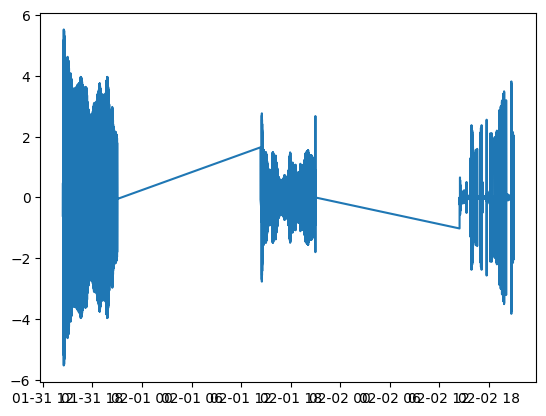

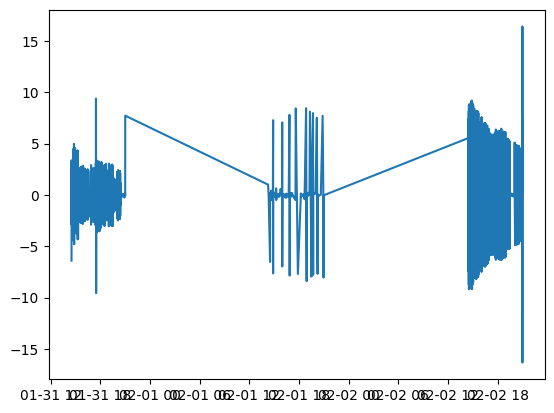

In [31]:
bids = df.filter((pl.col("side") == "B") & (pl.col("action") == "A") & (pl.col("flags") == 64)).with_columns(pl.col("price").diff())
asks = df.filter((pl.col("side") == "A") & (pl.col("action") == "A") & (pl.col("flags") == 64)).with_columns(pl.col("price").diff())
# Plot price over time
plt.plot(bids["ts_recv"], bids["price"])
plt.show()
plt.plot(asks["ts_recv"], asks["price"])    
plt.show()